## Credit Card Fraud Detection

Download Dataset - https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

### Install Required Libraries 

pip install numpy pandas seaborn matplotlib scikit-learn imbalanced-learn statsmodels


### Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, roc_auc_score, f1_score
from imblearn.over_sampling import SMOTE
from collections import Counter
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Load the Dataset
Download the dataset from Kaggle and load it into a DataFrame:

In [3]:
# Load the dataset
df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Checking for null values 

In [ ]:

df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Visualize the Data

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


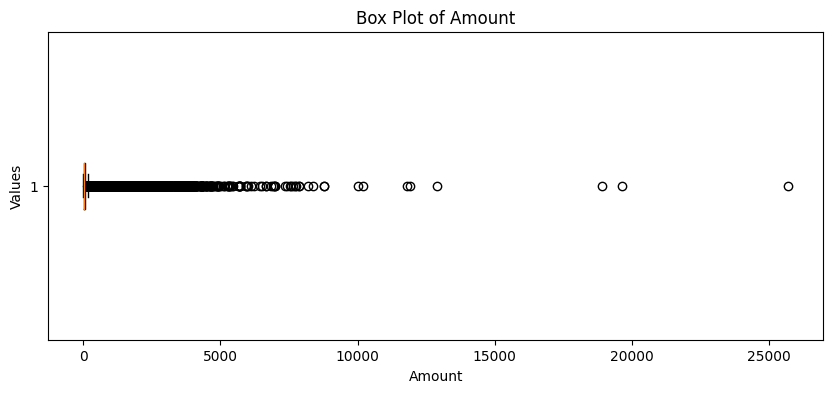

In [6]:
# Check column names
print(df.columns)

# Checking for outliers
plt.figure(figsize=(10, 4))
plt.boxplot(df['Amount'], vert=False)  # Adjust as needed

# Set labels and title
plt.xlabel('Amount')
plt.ylabel('Values')
plt.title('Box Plot of Amount')

# Show the plot
plt.show()


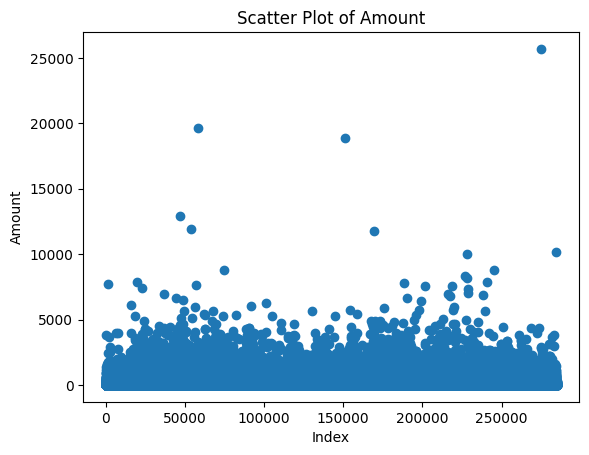

In [7]:
plt.scatter(df.index,df['Amount'])

# set labels and title
plt.xlabel('Index')
plt.ylabel('Amount')
plt.title('Scatter Plot of Amount')

# show the plot
plt.show()

### Finding outliers using IQR method

In [ ]:

Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Amount'] < lower_bound) | (df['Amount'] > upper_bound)]
print("Outliers:")
print(outliers)

Outliers:
            Time        V1        V2        V3        V4        V5        V6  \
2            1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
20          16.0  0.694885 -1.361819  1.029221  0.834159 -1.191209  1.309109   
51          36.0 -1.004929 -0.985978 -0.038039  3.710061 -6.631951  5.122103   
64          42.0 -0.522666  1.009923  0.276470  1.475289 -0.707013  0.355243   
85          55.0 -4.575093 -4.429184  3.402585  0.903915  3.002224 -0.491078   
...          ...       ...       ...       ...       ...       ...       ...   
284735  172727.0 -1.661169 -0.565425  0.294268 -1.549156 -2.301359  2.365956   
284748  172738.0  1.634178 -0.486939 -1.975967  0.495364  0.263635 -0.713049   
284753  172743.0  1.465737 -0.618047 -2.851391  1.425282  0.893893 -0.958325   
284757  172745.0 -1.757643 -0.982659  1.091540 -1.409539 -0.662159  0.046930   
284806  172792.0 -0.533413 -0.189733  0.703337 -0.506271 -0.012546 -0.649617   

              V7        V8   

In [9]:
outliers.shape

(31904, 31)

In [10]:
# Assuming 'Class' is the column that indicates fraud status
print(len(outliers[outliers['Class'] == 1]))  # Change 'Class' to the correct column name if needed


91


### Check the imbalance in the dataset

In [ ]:

legit = len(df[df['Class'] == 0])
fraud = len(df[df['Class'] == 1])
legit_percent = (legit / (fraud + legit)) * 100
fraud_percent = (fraud / (fraud + legit)) * 100

print(f"Number of Legit Transactions: {legit}")
print(f"Number of Fraud Transactions: {fraud}")
print(f"Percentage of Legit Transactions: {legit_percent:.4f}%")
print(f"Percentage of Fraud Transactions: {fraud_percent:.4f}%")


Number of Legit Transactions: 284315
Number of Fraud Transactions: 492
Percentage of Legit Transactions: 99.8273%
Percentage of Fraud Transactions: 0.1727%


### **Visualization**

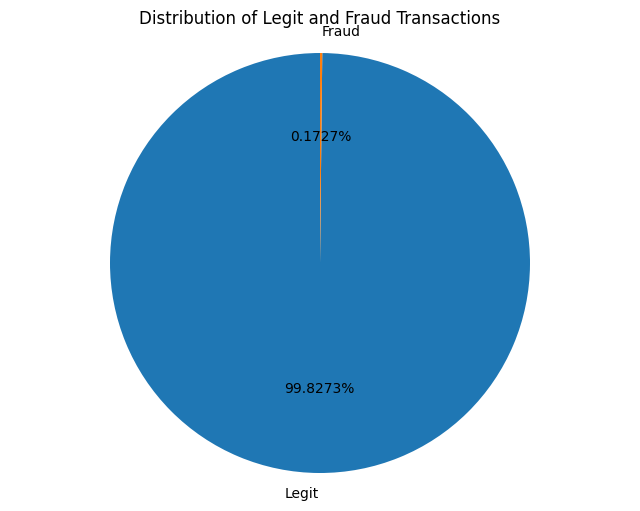

In [12]:
plt.figure(figsize=(8, 6))
plt.pie(df['Class'].value_counts(), autopct='%.4f%%', labels=['Legit', 'Fraud'], startangle=90)
plt.title('Distribution of Legit and Fraud Transactions')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()


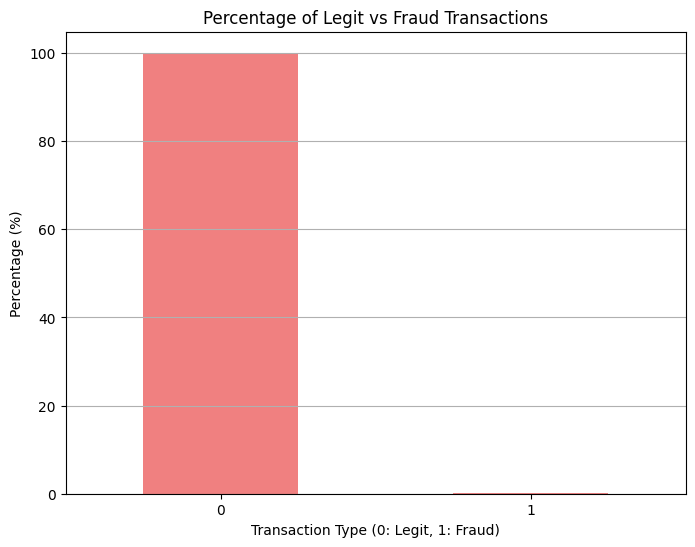

In [13]:
# Count the number of legit and fraud transactions
transaction_counts = df['Class'].value_counts()
transaction_percentage = (transaction_counts / transaction_counts.sum()) * 100

plt.figure(figsize=(8, 6))
transaction_percentage.plot(kind='bar', color='lightcoral')

plt.xlabel('Transaction Type (0: Legit, 1: Fraud)')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Legit vs Fraud Transactions')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


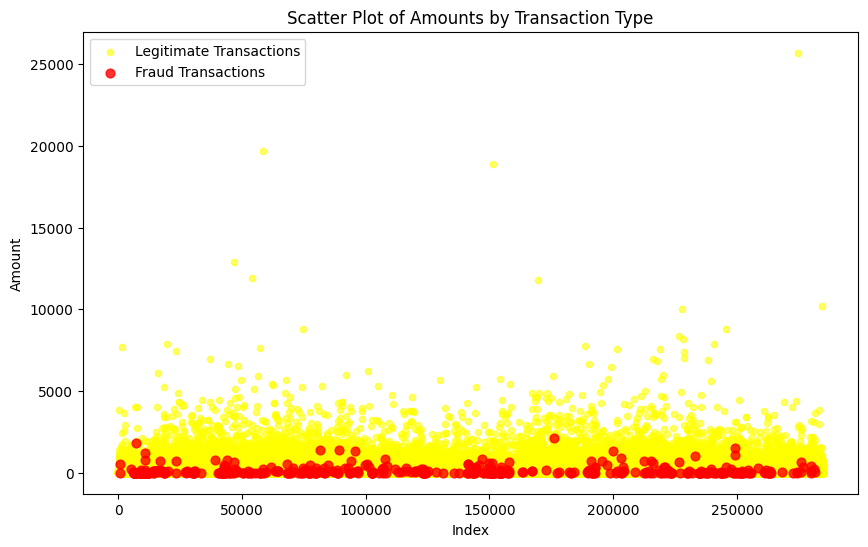

In [17]:
# Define the DataFrames
legit_df = df[df['Class'] == 0]
fraud_df = df[df['Class'] == 1]

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(legit_df.index, legit_df['Amount'], color='yellow', label='Legitimate Transactions', alpha=0.6, s=20)
plt.scatter(fraud_df.index, fraud_df['Amount'], color='red', label='Fraud Transactions', alpha=0.8, s=40)

plt.xlabel("Index")
plt.ylabel('Amount')
plt.title('Scatter Plot of Amounts by Transaction Type')

plt.legend()
plt.grid(False)  # Turn off grid if you don't want it
plt.show()


### **Problem Solving**

In [18]:
new_df = df.copy()
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [19]:
obJList = new_df.select_dtypes(include="object").columns
print(obJList)

Index([], dtype='object')


### **Label Encoding**

In [21]:
#Label Encoding for object datatypes for numeric conversion
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for i in obJList:
  new_df[i] = label_encoder.fit_transform(new_df[i].astype(str))

print(new_df.info())
new_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### **Multicolinearity**

<Axes: >

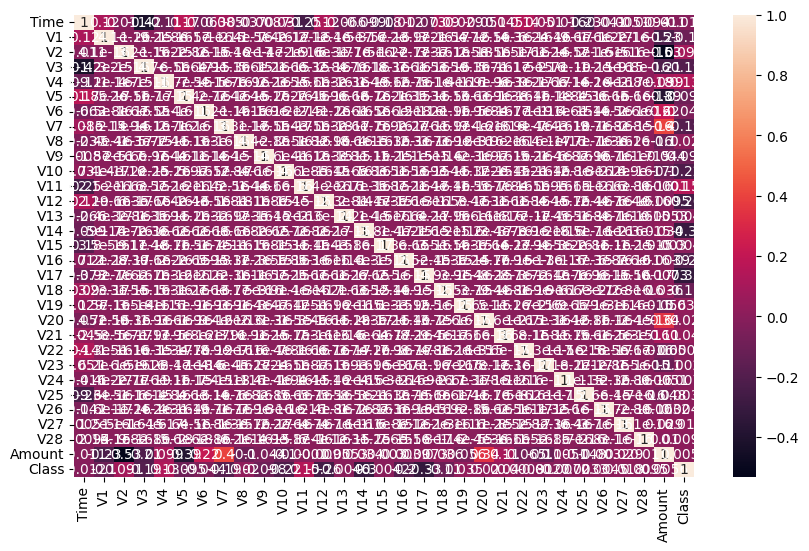

In [22]:
corr = new_df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

In [40]:
# Check for multicollinearity using VIF
def calc_vif(df):
    vif = pd.DataFrame()
    vif['variables'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif

# Ensure all columns are numeric before VIF calculation
numeric_new_df = new_df.select_dtypes(include=[np.number])
vif_df = calc_vif(numeric_new_df)
print(vif_df)

c:\Users\sharm\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


            variables       VIF
0                Time  1.106887
1                  V1  1.649280
2                  V2  4.448981
3                  V3  1.643600
4                  V4  1.156317
5                  V5  2.828299
6                  V6  1.571554
7                  V7  3.003186
8                  V8  1.130382
9                  V9  1.042854
10                V10  1.219793
11                V11  1.066577
12                V12  1.148345
13                V13  1.001325
14                V14  1.206784
15                V15  1.007564
16                V16  1.080947
17                V17  1.223165
18                V18  1.044699
19                V19  1.041185
20                V20  2.396164
21                V21  1.139181
22                V22  1.055378
23                V23  1.154228
24                V24  1.000485
25                V25  1.040051
26                V26  1.000565
27                V27  1.010635
28                V28  1.001473
29             Amount       inf
30      

<Axes: >

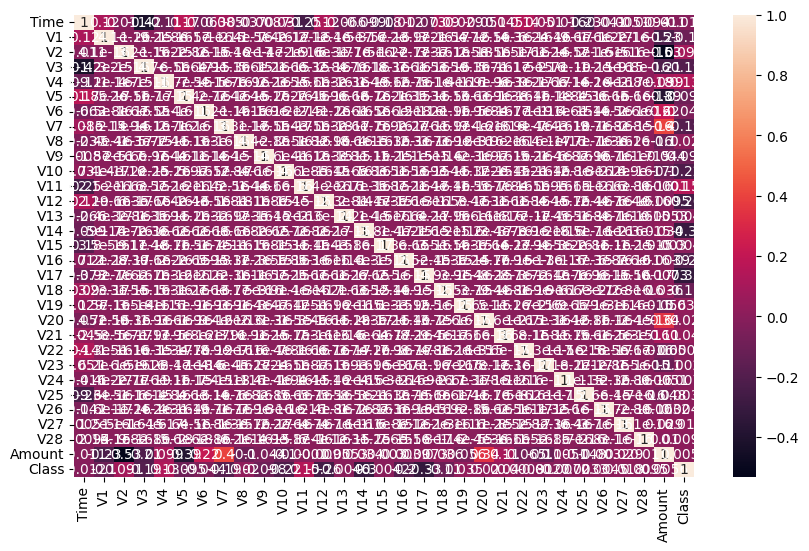

In [25]:
corr = new_df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

In [26]:
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### **Model Building**

In [30]:
# Normalize the features in new_df
features_to_normalize = ['Amount', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 
                          'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 
                          'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 
                          'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 
                          'V27', 'V28']

# Initialize the scaler
scaler = StandardScaler()

# Normalize the features
new_df[features_to_normalize] = scaler.fit_transform(new_df[features_to_normalize])

# Check the updated DataFrame
print(new_df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -0.694242 -0.044075  1.672773  0.973366 -0.245117  0.347068  0.193679   
1   0.0  0.608496  0.161176  0.109797  0.316523  0.043483 -0.061820 -0.063700   
2   1.0 -0.693500 -0.811578  1.169468  0.268231 -0.364572  1.351454  0.639776   
3   1.0 -0.493325 -0.112169  1.182516 -0.609727 -0.007469  0.936150  0.192071   
4   2.0 -0.591330  0.531541  1.021412  0.284655 -0.295015  0.071999  0.479302   

         V8        V9  ...       V22       V23       V24       V25       V26  \
0  0.082637  0.331128  ...  0.382854 -0.176911  0.110507  0.246585 -0.392170   
1  0.071253 -0.232494  ... -0.880077  0.162201 -0.561131  0.320694  0.261069   
2  0.207373 -1.378675  ...  1.063358  1.456320 -1.138092 -0.628537 -0.288447   
3  0.316018 -1.262503  ...  0.007267 -0.304777 -1.941027  1.241904 -0.460217   
4 -0.226510  0.744326  ...  1.100011 -0.220123  0.233250 -0.395202  1.041611   

        V27       V28    Amount 

In [31]:
# Handle the class imbalance using SMOTE
X = new_df.drop(['Class'], axis=1)
Y = new_df["Class"]

smote = SMOTE(random_state=42)
X_res, Y_res = smote.fit_resample(X, Y)
print(f"Resampled dataset shape: {Counter(Y_res)}")

Resampled dataset shape: Counter({0: 284315, 1: 284315})


### **Train Test Split**

In [32]:
# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X_res, Y_res, test_size=0.2, random_state=22)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

Shape of X_train: (454904, 31)
Shape of X_test: (113726, 31)


1. Model Building: Logistic Regression

In [33]:
# Hyperparameter tuning using GridSearchCV
# Logistic Regression
log_reg = LogisticRegression()
param_grid_lr = {
    'C': [0.01, 0.1],
    'penalty': ['l2']
}
grid_lr = GridSearchCV(log_reg, param_grid_lr, scoring='f1', cv=3, n_jobs=-1)
grid_lr.fit(X_train, Y_train)
log_reg_best = grid_lr.best_estimator_

2. Model Building: Decision Tree

In [34]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
param_grid_dt = {
    'max_depth': [10],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}
grid_dt = GridSearchCV(decision_tree, param_grid_dt, scoring='f1', cv=3, n_jobs=-1)
grid_dt.fit(X_train, Y_train)
decision_tree_best = grid_dt.best_estimator_

3. Model Building: Random Forest

In [35]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=20, max_features='sqrt', max_depth=10, min_samples_leaf=2)

# Define the parameter grid
param_grid_rf = {
    'n_estimators': [20],  # Fixed value since it's already set low
    'max_features': ['sqrt'],
    'max_depth': [10],
    'min_samples_leaf': [2]
}

# Perform GridSearchCV
grid_rf = GridSearchCV(random_forest, param_grid_rf, scoring='f1', cv=3, n_jobs=-1)
grid_rf.fit(X_train, Y_train)

# Now you have the trained Random Forest model ready for evaluation
random_forest_best = grid_rf.best_estimator_


### **Evaluate Model**

In [36]:
# Evaluate models
def evaluate_model(model, X_test, Y_test, model_name):
    Y_pred = model.predict(X_test)
    accuracy = model.score(X_test, Y_test) * 100
    precision = precision_score(Y_test, Y_pred)
    recall = recall_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)
    roc_auc = roc_auc_score(Y_test, Y_pred)

    print(f"\n{model_name} Evaluation")
    print(f"Accuracy: {accuracy:.2f}%")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC AUC Score: {roc_auc:.4f}")

    # Classification Report
    print("Classification Report:")
    print(classification_report(Y_test, Y_pred))

    # Confusion Matrix
    confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix(Y_test, Y_pred), display_labels=['Not Fraud', 'Fraud'])
    confusion_matrix_display.plot()
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    return accuracy, precision, recall, f1, roc_auc


Random Forest Evaluation
Accuracy: 99.18%
Precision: 0.9988
Recall: 0.9849
F1-Score: 0.9918
ROC AUC Score: 0.9918
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     56685
           1       1.00      0.98      0.99     57041

    accuracy                           0.99    113726
   macro avg       0.99      0.99      0.99    113726
weighted avg       0.99      0.99      0.99    113726



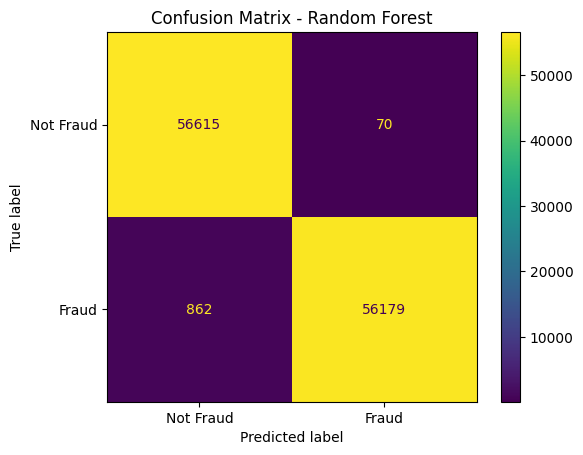


Decision Tree Evaluation
Accuracy: 99.24%
Precision: 0.9927
Recall: 0.9921
F1-Score: 0.9924
ROC AUC Score: 0.9924
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     56685
           1       0.99      0.99      0.99     57041

    accuracy                           0.99    113726
   macro avg       0.99      0.99      0.99    113726
weighted avg       0.99      0.99      0.99    113726



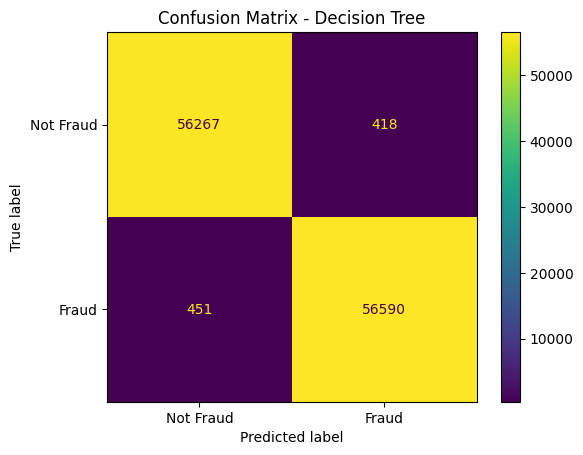


Logistic Regression Evaluation
Accuracy: 97.44%
Precision: 0.9851
Recall: 0.9634
F1-Score: 0.9742
ROC AUC Score: 0.9744
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     56685
           1       0.99      0.96      0.97     57041

    accuracy                           0.97    113726
   macro avg       0.97      0.97      0.97    113726
weighted avg       0.97      0.97      0.97    113726



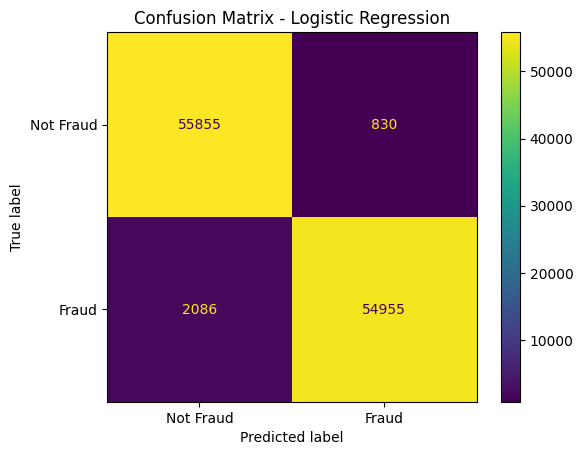

             Algorithm   Accuracy  Precision    Recall  F1-Score   ROC AUC
0        Random Forest  99.180486   0.998756  0.984888  0.991773  0.991827
1        Decision Tree  99.235883   0.992668  0.992093  0.992380  0.992360
2  Logistic Regression  97.435943   0.985121  0.963430  0.974155  0.974394


In [37]:
# Evaluate the best models
rf_metrics = evaluate_model(random_forest_best, X_test, Y_test, "Random Forest")
dt_metrics = evaluate_model(decision_tree_best, X_test, Y_test, "Decision Tree")
lr_metrics = evaluate_model(log_reg_best, X_test, Y_test, "Logistic Regression")

# Comparison of models
comparison_df = pd.DataFrame({
    'Algorithm': ['Random Forest', 'Decision Tree', 'Logistic Regression'],
    'Accuracy': [rf_metrics[0], dt_metrics[0], lr_metrics[0]],
    'Precision': [rf_metrics[1], dt_metrics[1], lr_metrics[1]],
    'Recall': [rf_metrics[2], dt_metrics[2], lr_metrics[2]],
    'F1-Score': [rf_metrics[3], dt_metrics[3], lr_metrics[3]],
    'ROC AUC': [rf_metrics[4], dt_metrics[4], lr_metrics[4]]
})

print(comparison_df)

### **Comparison**

In [38]:
print(comparison_df)

             Algorithm   Accuracy  Precision    Recall  F1-Score   ROC AUC
0        Random Forest  99.180486   0.998756  0.984888  0.991773  0.991827
1        Decision Tree  99.235883   0.992668  0.992093  0.992380  0.992360
2  Logistic Regression  97.435943   0.985121  0.963430  0.974155  0.974394


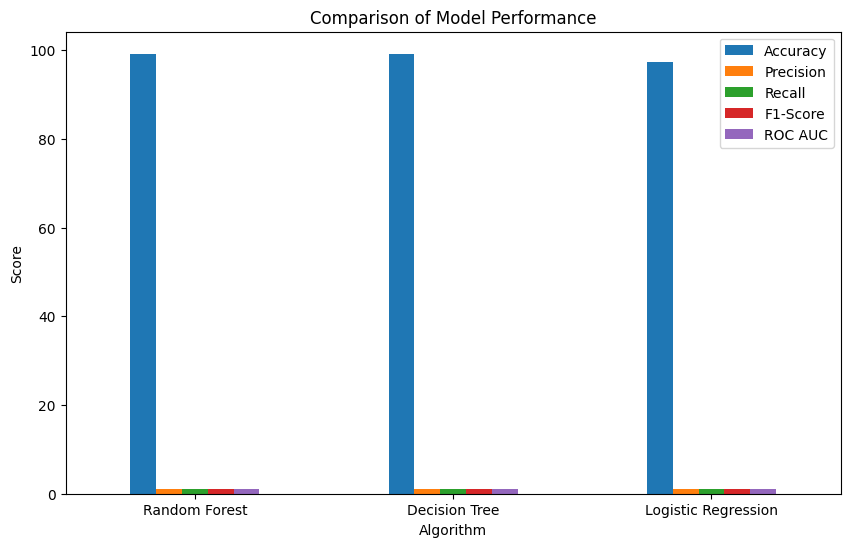

In [39]:
# Visualization of comparison
comparison_df.set_index('Algorithm', inplace=True)
comparison_df.plot(kind='bar', figsize=(10, 6))
plt.title("Comparison of Model Performance")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.show()